Making the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sys
sys.path.insert(0, '../scr') # way to get access to the scr path
from data_frame_work import DataFrameWork
from regressor_models import RegressorModels

# calling the data frame with the information of the csv file
immo = DataFrameWork.get_data_frame()
display(immo.head())
display(immo.shape)

,price,floor,bedroomCount,netHabitableSurface,constructionYear,facadeCount,floorCount,hasLift,hasGarden,gardenSurface,...,A,A+,A++,B,C,D,E,F,G,NO_EPC_SCORE
id,,,,,,,,,,,,,,,,,,,,,
10616910,399000,1.0,2.0,125.0,2013.0,1.0,1.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616911,423000,2.0,3.0,155.0,2014.0,4.0,3.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616934,169000,0.0,1.0,54.0,1850.0,2.0,2.0,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616833,275000,1.0,1.0,66.0,2025.0,3.0,3.0,1,0,0.0,...,1,0,0,0,0,0,0,0,0,0
10616966,185000,3.0,2.0,74.0,1975.0,1.0,3.0,0,0,0.0,...,0,0,0,0,1,0,0,0,0,0


(10540, 89)

In [2]:
display(immo.corr())
#immo.corr().to_csv('../data/_data_clean_correlation.csv')

,price,floor,bedroomCount,netHabitableSurface,constructionYear,facadeCount,floorCount,hasLift,hasGarden,gardenSurface,...,A,A+,A++,B,C,D,E,F,G,NO_EPC_SCORE
price,1.000000,0.002659,0.409739,0.167857,0.032755,0.159733,-0.048914,-0.013537,0.089662,NaN,...,0.043370,-0.001241,0.007566,0.030817,0.002911,-0.023273,-0.027477,-0.061876,-0.031288,0.036870
floor,0.002659,1.000000,-0.013967,-0.005239,0.004085,-0.011411,0.035012,0.016034,-0.019313,NaN,...,-0.001962,-0.000604,-0.001047,-0.002430,-0.003997,-0.005463,0.001405,0.023530,-0.002522,-0.005721
bedroomCount,0.409739,-0.013967,1.000000,0.180915,-0.167238,0.237739,-0.309138,-0.301899,0.219145,NaN,...,-0.060452,-0.001319,0.000189,-0.064135,0.026418,0.049635,0.036273,0.060846,-0.006924,-0.026783
netHabitableSurface,0.167857,-0.005239,0.180915,1.000000,-0.055014,0.128492,-0.107297,-0.101573,0.043148,NaN,...,-0.024385,0.003894,0.007257,-0.037183,-0.005844,-0.001303,-0.001452,0.060237,-0.002534,0.017641
constructionYear,0.032755,0.004085,-0.167238,-0.055014,1.000000,-0.026452,0.123659,0.306831,-0.071308,NaN,...,0.277559,0.049298,0.047862,0.139060,-0.066080,-0.162576,-0.166718,-0.246069,-0.193622,0.256754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D,-0.023273,-0.005463,0.049635,-0.001303,-0.162576,0.035661,-0.029881,-0.076425,0.024223,NaN,...,-0.115642,-0.017320,-0.015663,-0.199131,-0.170362,1.000000,-0.112949,-0.129470,-0.075703,-0.174904
E,-0.027477,0.001405,0.036273,-0.001452,-0.166718,0.019313,-0.031265,-0.079818,0.017228,NaN,...,-0.091076,-0.013641,-0.012336,-0.156830,-0.134172,-0.112949,1.000000,-0.101966,-0.059621,-0.137749
F,-0.061876,0.023530,0.060846,0.060237,-0.246069,0.077024,-0.124053,-0.162748,0.063502,NaN,...,-0.104397,-0.015636,-0.014140,-0.179768,-0.153797,-0.129470,-0.101966,1.000000,-0.068342,-0.157897
G,-0.031288,-0.002522,-0.006924,-0.002534,-0.193622,0.021966,-0.001392,-0.060697,0.006640,NaN,...,-0.061043,-0.009142,-0.008268,-0.105113,-0.089927,-0.075703,-0.059621,-0.068342,1.000000,-0.092325


<Axes: title={'center': 'correlation'}>

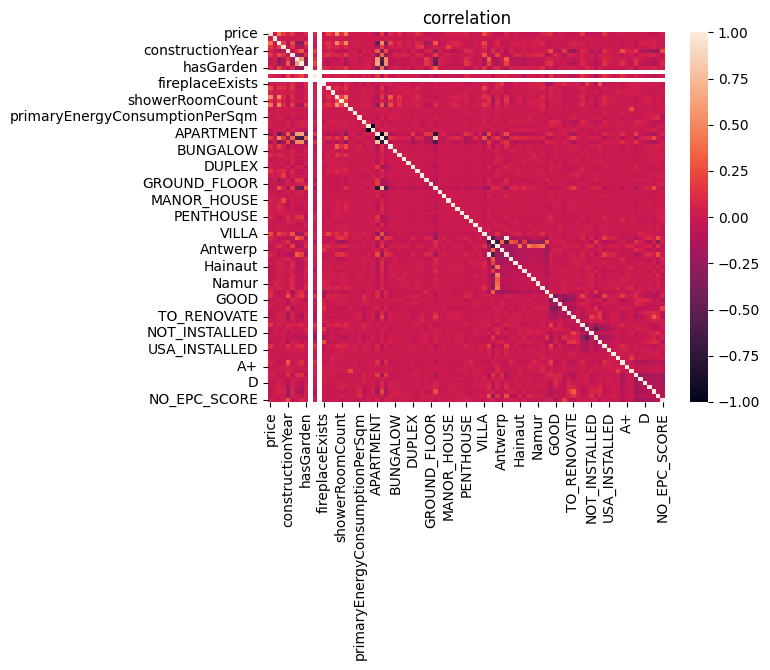

In [3]:
plt.title("correlation")
correlation = immo.corr()
sns.heatmap(correlation, annot=False, fmt='.2f')

In [4]:
# Getting the X and y parameters
X, y = RegressorModels.get_X_y(immo)

print(X.shape)
print(y.shape)

(10540, 85)
(10540, 1)


In [5]:
# Splitting the X and y parameters with the train and test information in
X_train, X_test, y_train, y_test = RegressorModels.get_train_test(X, y)

print(X_train.shape)
print(X_test.shape)

(7378, 85)
(3162, 85)


In [6]:
# making instantiation of LinearRegression
model = LinearRegression()
# fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [7]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.44774081225260676
intercept: [-619295.65387515]
slope: [[ 3.86312378e+04  5.49356461e+01  2.37191197e+02  1.91174152e+04
   1.03345062e+03  5.04046439e+04  8.49127644e+03  3.58113771e+03
   1.51690544e+04  2.56595157e+05  1.51690903e+05  1.74301494e+05
   4.30484702e+03  4.00171268e+04 -2.78188444e+00 -1.48763254e+02
   1.38026165e+00  1.78713440e+02  6.09934903e+04 -6.09934903e+04
  -6.89057576e+04  6.89057576e+04  4.49022115e+03 -2.26537411e+05
  -5.75454155e+04  1.88655579e+05 -1.44860856e+05  1.04768843e+04
   2.62775770e+04  2.50366810e+05  1.04911504e+05 -7.93601987e+04
   1.32368763e+04 -9.07857492e+04 -1.25125396e+05  1.10973547e+05
   8.26215579e+04 -4.22884523e+04 -6.80299044e+04  3.87546577e+04
   1.56712613e+05 -1.00399141e+05 -9.82657450e+04 -7.57118562e+04
   1.21432298e+05  4.77189357e+04  2.78076639e+04 -7.55265996e+04
  -1.25950841e+04  4.77189357e+04 -1.95417721e+04  6.91858620e+03
  -7.59306456e+04 -5.46964341e+04 -2.00309155e+04 -3.20

In [8]:
# predition with training data 
pred_train= model.predict(X_train)
# calculating performance metric training
score, mse, rmse, mae = RegressorModels.get_performance(y_train, pred_train)

# Print the performance metrics
print('Train: Score: %.2f' %score)
print('Train: Mean Squared Error:', np.sqrt(mse))
print('Train: Root Mean Squared Error:', rmse)
print('Train: Mean Absolute Error: ', mae)

# predition with test data
pred_test= model.predict(X_test)
# calculating performance metric test
score, mse, rmse, mae = RegressorModels.get_performance(y_test, pred_test)

# Print the performance metrics
print('______________________________________')
print('Test: Score: %.2f' %score)
print('Test: Mean Squared Error:', np.sqrt(mse))
print('Test: Root Mean Squared Error:', rmse)
print('Test: Mean Absolute Error: ', mae)

Train: Score: 0.45
Train: Mean Squared Error: 304842.1748740689
Train: Root Mean Squared Error: 304842.1748740689
Train: Mean Absolute Error:  148378.33318714498
______________________________________
Test: Score: 0.39
Test: Mean Squared Error: 314375.61844989605
Test: Root Mean Squared Error: 314375.61844989605
Test: Mean Absolute Error:  150425.54760737487


[Text(0.5, 1.0, 'Test VS Predicted data'),
 Text(0, 0.5, 'Predicted data'),
 Text(0.5, 0, 'Test data')]

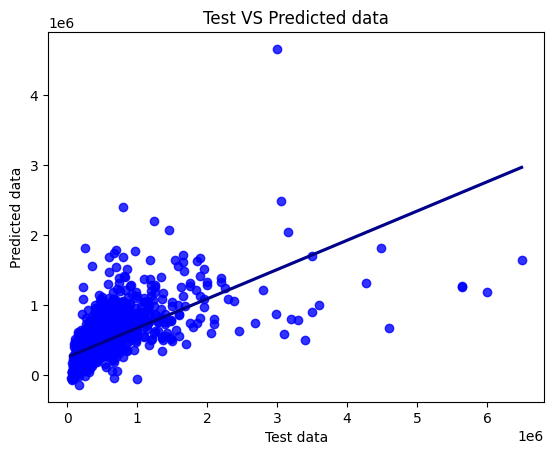

In [9]:
# Plot measuring the test and prediction test data
sns.regplot(x=y_test, y=pred_test, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "darkblue"}).set(
    title='Test VS Predicted data', ylabel='Predicted data', xlabel='Test data')